In [29]:
## Database Phase
import pandas as pd
import numpy as np

#Visualization Phase
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.pylab as pylab
%matplotlib inline
pd.set_option('display.max_columns', 500)
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12, 8

import warnings 
warnings.filterwarnings('ignore')

import re

# Чтения базы 


In [53]:
anime_df = pd.read_csv('anime.csv')
rating_df = pd.read_csv('rating.csv')

In [54]:
anime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [55]:
anime_df.shape

(12294, 7)

In [56]:
anime_df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [57]:
anime_df['genre']

0                     Drama, Romance, School, Supernatural
1        Action, Adventure, Drama, Fantasy, Magic, Mili...
2        Action, Comedy, Historical, Parody, Samurai, S...
3                                         Sci-Fi, Thriller
4        Action, Comedy, Historical, Parody, Samurai, S...
                               ...                        
12289                                               Hentai
12290                                               Hentai
12291                                               Hentai
12292                                               Hentai
12293                                               Hentai
Name: genre, Length: 12294, dtype: object

In [58]:
anime_df['genre'].iloc[0]

'Drama, Romance, School, Supernatural'

In [59]:
anime_df['name'].loc[2]

'Gintama°'

In [60]:
type(anime_df['genre'].iloc[0])

str

In [61]:
anime_df['name']

0                                           Kimi no Na wa.
1                         Fullmetal Alchemist: Brotherhood
2                                                 Gintama°
3                                              Steins;Gate
4                                            Gintama&#039;
                               ...                        
12289         Toushindai My Lover: Minami tai Mecha-Minami
12290                                          Under World
12291                       Violence Gekiga David no Hoshi
12292    Violence Gekiga Shin David no Hoshi: Inma Dens...
12293                     Yasuji no Pornorama: Yacchimae!!
Name: name, Length: 12294, dtype: object

In [62]:
anime_df['name'].iloc[0]    

'Kimi no Na wa.'

In [63]:
anime_df['type'].iloc[0]

'Movie'

In [64]:
anime_df['type'].value_counts()

TV         3787
OVA        3311
Movie      2348
Special    1676
ONA         659
Music       488
Name: type, dtype: int64

In [65]:
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB


In [70]:
rating_df.shape

(7813737, 3)

In [71]:
rating_df.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


# Обьединение данных

In [67]:
df = pd.merge(anime_df, rating_df, on="anime_id", suffixes = ['','_user'])

In [68]:
df.head()

,anime_id,name,genre,type,episodes,rating,members,user_id,rating_user
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278,-1


In [69]:
df.shape

(7813727, 9)

In [72]:
df["rating_user"].replace({-1: np.nan}, inplace = True )

In [73]:
df.head()

,anime_id,name,genre,type,episodes,rating,members,user_id,rating_user
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5.0
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10.0
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10.0
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10.0
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278,NaN


In [74]:
df.dropna(axis = 0, how = 'any', inplace = True  )
df.isnull().sum()


anime_id       0
name           0
genre          0
type           0
episodes       0
rating         0
members        0
user_id        0
rating_user    0
dtype: int64

In [75]:
df.head()

,anime_id,name,genre,type,episodes,rating,members,user_id,rating_user
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5.0
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10.0
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10.0
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10.0
5,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,322,10.0


In [76]:
df['rating'].value_counts()

8.06    71090
8.17    69037
7.81    67284
7.87    64402
7.95    64058
        ...  
2.55        1
3.38        1
3.67        1
4.18        1
3.20        1
Name: rating, Length: 574, dtype: int64

# Очищение имени Аниме 

In [77]:
def name_cleaning(text):
    text = re.sub(r'&quot;','', text)
    text = re.sub(r'&quot;','', text)
    text = re.sub(r'.hack//', '' , text)
    text = re.sub(r'&#039;', '', text)
    text = re.sub(r'A&#039;s', '', text)
    text = re.sub(r'I&#039;', 'I\'', text)
    text = re.sub(r'&amp;', 'and', text)
    
    
    return text

df['name'] = df['name'].apply(name_cleaning)


In [78]:
df["name"]

0                                             Kimi no Na wa.
1                                             Kimi no Na wa.
2                                             Kimi no Na wa.
3                                             Kimi no Na wa.
5                                             Kimi no Na wa.
                                 ...                        
7813713         Toushindai My Lover: Minami tai Mecha-Minami
7813716                                          Under World
7813717                                          Under World
7813720                       Violence Gekiga David no Hoshi
7813724    Violence Gekiga Shin David no Hoshi: Inma Dens...
Name: name, Length: 6337146, dtype: object

# Исследовательский анализ данных    

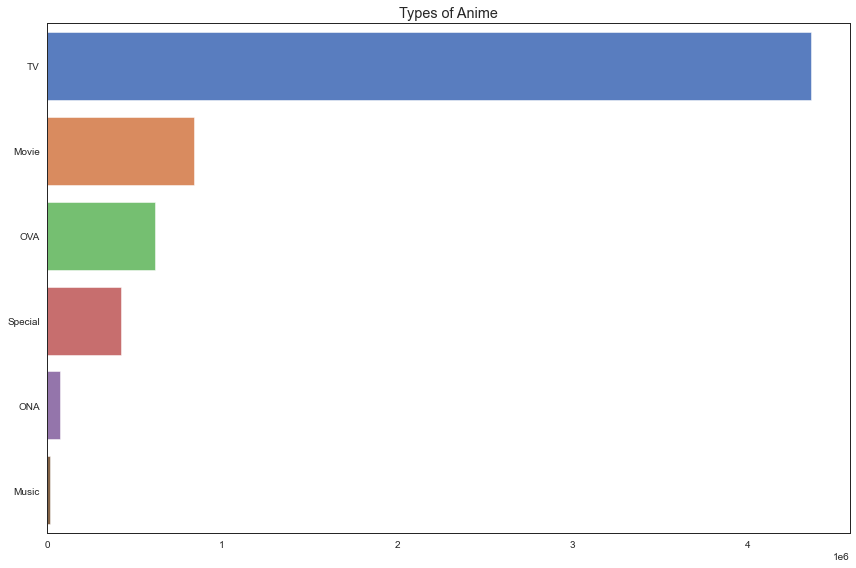

In [80]:
type_count = df['type'].value_counts()
      

sns.barplot(x=type_count.values,
           y=type_count.index,
           palette='muted').set_title('Types of Anime')

plt.tight_layout()
plt.show()

In [82]:
top_anime = df.sort_values(by = 'rating', ascending = False)
top_anime.drop_duplicates(subset = ['name'], inplace = True)
top_anime = top_anime[['name','rating']].sort_values(by = 'rating', ascending = False).head(10)


In [83]:
top_anime

,name,rating
0,Kimi no Na wa.,9.37
18623,Fullmetal Alchemist: Brotherhood,9.26
27693,Gintama°,9.25
41017,Steins;Gate,9.17
49875,Gintama,9.16
51932,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,9.15
58060,Hunter x Hunter (2011),9.13
65504,Gintama: Enchousen,9.11
61534,Ginga Eiyuu Densetsu,9.11
64346,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...,9.10


Text(0, 0.5, 'Rating')

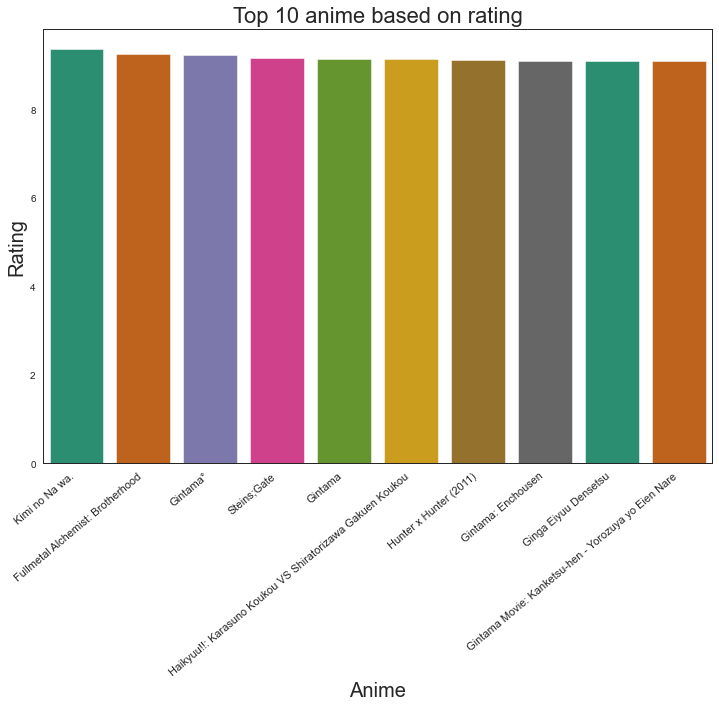

In [85]:
ax = sns.barplot(x = "name", y="rating", data=top_anime, palette="Dark2")
ax.set_xticklabels(ax.get_xticklabels(), fontsize = 11, rotation=40, ha="right")
ax.set_title('Top 10 anime based on rating', fontsize=22)
ax.set_xlabel('Anime', fontsize=20)
ax.set_ylabel('Rating', fontsize=20)

Text(0.5, 1.0, 'Rating of websites')

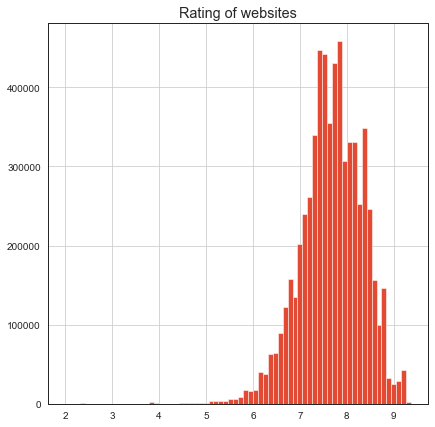

In [86]:
plt.figure(figsize=(15, 7))
plt.subplot(1 ,2 ,1)
df['rating'].hist(bins=70)
plt.title("Rating of websites")


In [128]:
from wordcloud import WordCloud
from collections import defaultdict

all_genres = defaultdict(int)

for genres in df['genre']:
    for genre in genres.split(','):
        all_genres[genre.strip()] += 1
        

genres_cloud = WordCloud(width=800, height=400, background_color='white', 
                         colormap='gnuplot').generate_from_frequencies(all_genres)
plt.imshow(genres_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

ModuleNotFoundError: No module named 'wordcloud'

array([[<AxesSubplot:title={'center':'rating'}>]], dtype=object)

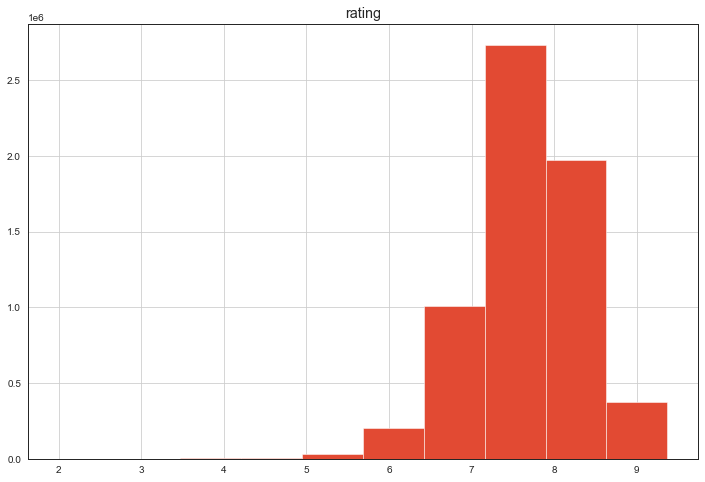

In [98]:
df.hist(column="rating")

In [100]:
df.head()

,anime_id,name,genre,type,episodes,rating,members,user_id,rating_user
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5.0
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10.0
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10.0
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10.0
5,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,322,10.0


# Создание тега

In [102]:
def genre_cleaning(text):
    text = re.sub(r",",'',text)
    return text

df['genre'] = df['genre'].apply(genre_cleaning)
df['genre']

0          Drama Romance School Supernatural
1          Drama Romance School Supernatural
2          Drama Romance School Supernatural
3          Drama Romance School Supernatural
5          Drama Romance School Supernatural
                         ...                
7813713                               Hentai
7813716                               Hentai
7813717                               Hentai
7813720                               Hentai
7813724                               Hentai
Name: genre, Length: 6337146, dtype: object

In [104]:
df['tags'] = df['genre'] + " " + df["type"]

In [105]:
df.head()

,anime_id,name,genre,type,episodes,rating,members,user_id,rating_user,tags
0,32281,Kimi no Na wa.,Drama Romance School Supernatural,Movie,1,9.37,200630,99,5.0,Drama Romance School Supernatural Movie
1,32281,Kimi no Na wa.,Drama Romance School Supernatural,Movie,1,9.37,200630,152,10.0,Drama Romance School Supernatural Movie
2,32281,Kimi no Na wa.,Drama Romance School Supernatural,Movie,1,9.37,200630,244,10.0,Drama Romance School Supernatural Movie
3,32281,Kimi no Na wa.,Drama Romance School Supernatural,Movie,1,9.37,200630,271,10.0,Drama Romance School Supernatural Movie
5,32281,Kimi no Na wa.,Drama Romance School Supernatural,Movie,1,9.37,200630,322,10.0,Drama Romance School Supernatural Movie


In [107]:
df["tags"].iloc[0:20]

0     Drama Romance School Supernatural Movie
1     Drama Romance School Supernatural Movie
2     Drama Romance School Supernatural Movie
3     Drama Romance School Supernatural Movie
5     Drama Romance School Supernatural Movie
6     Drama Romance School Supernatural Movie
7     Drama Romance School Supernatural Movie
8     Drama Romance School Supernatural Movie
9     Drama Romance School Supernatural Movie
10    Drama Romance School Supernatural Movie
11    Drama Romance School Supernatural Movie
12    Drama Romance School Supernatural Movie
14    Drama Romance School Supernatural Movie
15    Drama Romance School Supernatural Movie
16    Drama Romance School Supernatural Movie
17    Drama Romance School Supernatural Movie
19    Drama Romance School Supernatural Movie
20    Drama Romance School Supernatural Movie
21    Drama Romance School Supernatural Movie
22    Drama Romance School Supernatural Movie
Name: tags, dtype: object

In [108]:
df = df.drop_duplicates(subset = ['name', 'anime_id'], keep='first')

In [109]:
df["tags"].iloc[0:20]

0                   Drama Romance School Supernatural Movie
2199      Action Adventure Drama Fantasy Magic Military ...
26774     Action Comedy Historical Parody Samurai Sci-Fi...
28159                                    Sci-Fi Thriller TV
47442     Action Comedy Historical Parody Samurai Sci-Fi...
51115                 Comedy Drama School Shounen Sports TV
52348               Action Adventure Shounen Super Power TV
60923                       Drama Military Sci-Fi Space OVA
61826     Action Comedy Historical Parody Samurai Sci-Fi...
64351     Action Comedy Historical Parody Samurai Sci-Fi...
66888     Drama Fantasy Romance Slice of Life Supernatur...
84742                            Drama School Shounen Movie
84786     Action Comedy Historical Parody Samurai Sci-Fi...
89760     Action Drama Mecha Military Sci-Fi Super Power TV
114002                Comedy Drama School Shounen Sports TV
117977                   Adventure Drama Supernatural Movie
140951                Drama Music Romanc

In [110]:
df.head()

,anime_id,name,genre,type,episodes,rating,members,user_id,rating_user,tags
0,32281,Kimi no Na wa.,Drama Romance School Supernatural,Movie,1,9.37,200630,99,5.0,Drama Romance School Supernatural Movie
2199,5114,Fullmetal Alchemist: Brotherhood,Action Adventure Drama Fantasy Magic Military ...,TV,64,9.26,793665,3,10.0,Action Adventure Drama Fantasy Magic Military ...
26774,28977,Gintama°,Action Comedy Historical Parody Samurai Sci-Fi...,TV,51,9.25,114262,43,10.0,Action Comedy Historical Parody Samurai Sci-Fi...
28159,9253,Steins;Gate,Sci-Fi Thriller,TV,24,9.17,673572,5,9.0,Sci-Fi Thriller TV
47442,9969,Gintama,Action Comedy Historical Parody Samurai Sci-Fi...,TV,51,9.16,151266,5,9.0,Action Comedy Historical Parody Samurai Sci-Fi...


In [111]:
df.shape

(9892, 10)

In [112]:
df1 = df.drop(['genre', 'type', 'episodes', 'rating', 'members', 'anime_id', 'rating_user'], axis=1)

In [113]:
df1.head()

,name,user_id,tags
0,Kimi no Na wa.,99,Drama Romance School Supernatural Movie
2199,Fullmetal Alchemist: Brotherhood,3,Action Adventure Drama Fantasy Magic Military ...
26774,Gintama°,43,Action Comedy Historical Parody Samurai Sci-Fi...
28159,Steins;Gate,5,Sci-Fi Thriller TV
47442,Gintama,5,Action Comedy Historical Parody Samurai Sci-Fi...


In [116]:
df1 = df1.reset_index()
df1 = df1.drop(['index'], axis=1)
df1.rename(columns  = {'name':'animename'},  inplace =True)
df1.head()

,animename,user_id,tags
0,Kimi no Na wa.,99,Drama Romance School Supernatural Movie
1,Fullmetal Alchemist: Brotherhood,3,Action Adventure Drama Fantasy Magic Military ...
2,Gintama°,43,Action Comedy Historical Parody Samurai Sci-Fi...
3,Steins;Gate,5,Sci-Fi Thriller TV
4,Gintama,5,Action Comedy Historical Parody Samurai Sci-Fi...


# Построение Моделей


In [117]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=100, stop_words='english')


In [118]:
vector = cv.fit_transform(df1["tags"]).toarray()

In [119]:
vector.shape

(9892, 51)

In [120]:
cv.get_feature_names()

['action',
 'adventure',
 'ai',
 'arts',
 'cars',
 'comedy',
 'dementia',
 'demons',
 'drama',
 'ecchi',
 'fantasy',
 'fi',
 'game',
 'harem',
 'hentai',
 'historical',
 'horror',
 'josei',
 'kids',
 'life',
 'magic',
 'martial',
 'mecha',
 'military',
 'movie',
 'music',
 'mystery',
 'ona',
 'ova',
 'parody',
 'police',
 'power',
 'psychological',
 'romance',
 'samurai',
 'school',
 'sci',
 'seinen',
 'shoujo',
 'shounen',
 'slice',
 'space',
 'special',
 'sports',
 'super',
 'supernatural',
 'thriller',
 'tv',
 'vampire',
 'yaoi',
 'yuri']

## Вычисление косинусного сходства

In [121]:
from sklearn.metrics.pairwise import cosine_similarity


In [122]:
similarity = cosine_similarity(vector)


In [123]:
similarity

array([[1.        , 0.15811388, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.15811388, 1.        , 0.35355339, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.35355339, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ]])

In [124]:
similarity.shape

(9892, 9892)

In [125]:
def recommend(anime):
    index = df1[df1['animename'] == anime].index[0]
    distanses = similarity[index]
    anime_list = sorted(list(enumerate(distanses)), reverse= True, key = lambda x: x[1])[1:11]
    
    for i in anime_list:
        print(df1.iloc[i[0]].animename)

In [126]:
recommend("Gintama")

Gintama
Gintama: Enchousen
Gintama
Gintama: Yorinuki Gintama-san on Theater 2D
Gintama Movie: Shinyaku Benizakura-hen
Gintama: Shinyaku Benizakura-hen
Gintama: Jump Festa 2014 Special
Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare
Gintama: Nanigoto mo Saiyo ga Kanjin nano de Tasho Senobisuru Kurai ga Choudoyoi
Dokkoida


In [127]:
df1.head()

,animename,user_id,tags
0,Kimi no Na wa.,99,Drama Romance School Supernatural Movie
1,Fullmetal Alchemist: Brotherhood,3,Action Adventure Drama Fantasy Magic Military ...
2,Gintama°,43,Action Comedy Historical Parody Samurai Sci-Fi...
3,Steins;Gate,5,Sci-Fi Thriller TV
4,Gintama,5,Action Comedy Historical Parody Samurai Sci-Fi...
